<a href="https://colab.research.google.com/github/elhamod/BA820/blob/main/Hands-on/03-dimensionality-reduction/PCA_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's use the MNIST dataset (hand-written digits) to appreicate how powerful PCA is.

##Load the data

In [29]:
# !pip install joblib

In [30]:
from sklearn.datasets import fetch_openml
from joblib import Memory

# fetch and cache the dataset
mem = Memory('./tmp')
fetch_openml_cached = mem.cache(fetch_openml)
mnist = fetch_openml_cached(name='mnist_784')


In [31]:
data, label = mnist["data"], mnist["target"]

data.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Pre-process the data. Should we normalize?

In [32]:
data = data/255

If you want to get a subset of the digits (e.g., only 0s and 1s) or sample

In [33]:
# get a subset of digits
label = label.astype(int)

# Filter the dataset to contain only the digits '0' and '1'
digits = [0, 1]
data = data[label.isin(digits)]
label = label[label.isin(digits)]
data.shape

(14780, 784)

It is too much data. Let's do some sampling using `StratifiedShuffleSplit`

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=1000)

_, sampled_indices = next(splitter.split(data, label))
data_sampled = data.iloc[sampled_indices]
label_sampled = label.iloc[sampled_indices]

How many images of each label is there?

In [35]:
label_sampled.value_counts()

1    533
0    467
Name: class, dtype: int64

##Let's do some clustering

Let's use K-means

In [36]:
from sklearn.cluster import KMeans


# Find clusters
k = len(digits)
kmeans_result = KMeans(n_clusters=k, random_state=0).fit(data_sampled)

data_sampled['cluster_labels'] = kmeans_result.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-36-6246834ae881>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Let's look at the centroids

In [37]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

for i in range(kmeans_result.cluster_centers_.shape[0]): # for each centroid
  display(Image.fromarray(np.reshape(kmeans_result.cluster_centers_[i]*255,(28,28))).convert("L")) # Convert numpy array to an image
  clust_representative = label_sampled[kmeans_result.labels_ == i].mode().iloc[0] # Get the supervised label of the image
  print('cluster', i, 'with label', clust_representative, '\n')

cluster 0 with label 1 



cluster 1 with label 0 



Let's look at some images from the data and find which centroid it's closest to

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X

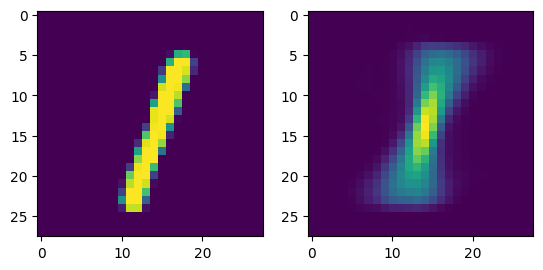

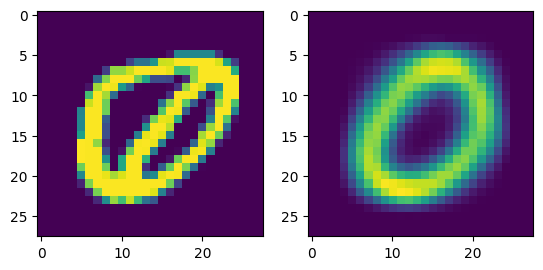

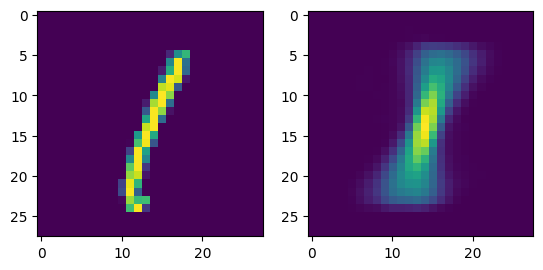

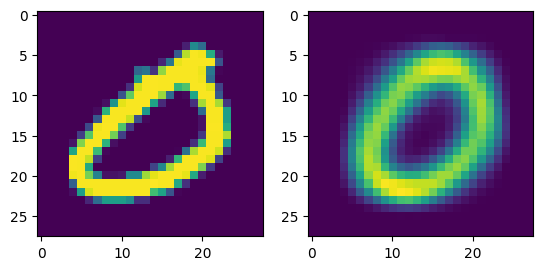

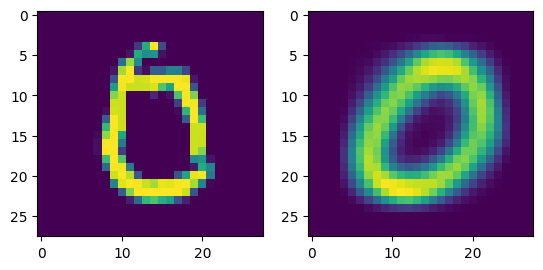

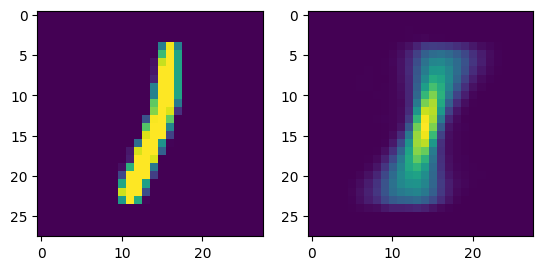

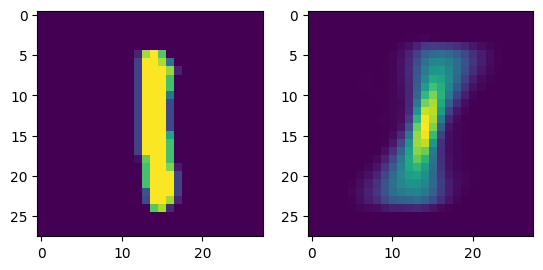

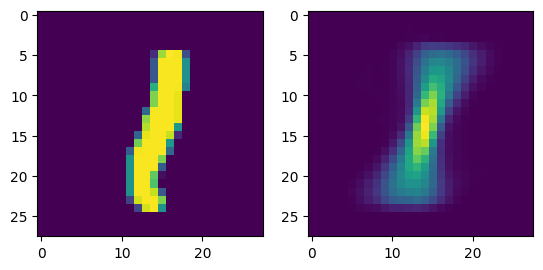

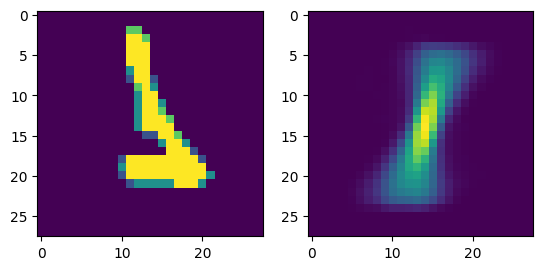

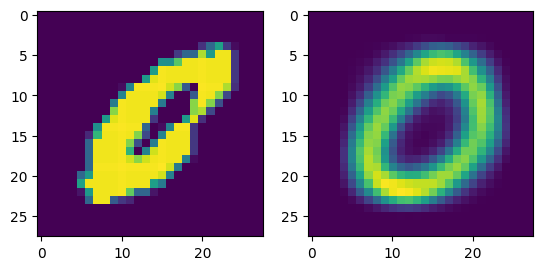

In [38]:
import matplotlib.pyplot as plt

for i in range(10): # 10 mimages
  # convert numpy array to image
  example = data_sampled.drop('cluster_labels', axis=1).iloc[i]
  example_numpy = example.to_numpy()
  img = Image.fromarray(np.reshape(example_numpy*255,(28,28))).convert("L")

  centroid = Image.fromarray(np.reshape(kmeans_result.cluster_centers_[kmeans_result.predict([example])]*255,(28,28))).convert("L")

  fig, ax = plt.subplots(1,2)
  ax[0].imshow(img);
  ax[1].imshow(centroid);

Is the cluster's centroid a real image?

## Now, let's try PCA

In [39]:
from sklearn.decomposition import PCA
import pandas as pd

# Create the model
model = PCA(3)

data_sampled_withoutclusterlabel = data_sampled.drop('cluster_labels', axis=1)

#fit the data
model.fit(data_sampled_withoutclusterlabel)
transformed_data = model.transform(data_sampled_withoutclusterlabel)

# transform the data
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC1', 'PC2', 'PC3'])
transformed_data_df['cluster_labels'] = data_sampled['cluster_labels'].values

transformed_data_df

,PC1,PC2,PC3,cluster_labels
0,-4.021806,1.071062,1.065901,0
1,3.102956,1.710517,2.828207,1
2,-3.667510,0.713657,1.220090,0
3,4.990061,1.630331,-1.201970,1
4,1.911505,-0.742692,0.128743,1
...,...,...,...,...
995,-3.519111,3.745809,2.067228,0
996,-3.648954,-0.823685,-0.190162,0
997,-3.999359,-0.009846,0.174531,0
998,6.102865,-2.199329,3.915393,1


How many images are their in each cluster?

In [40]:
transformed_data_df['cluster_labels'].value_counts()

0    543
1    457
Name: cluster_labels, dtype: int64

Let's plot the cluster in the new space

In [41]:
import plotly.express as px

fig = px.scatter_3d(transformed_data_df, x='PC1', y='PC2', z='PC3', color = 'cluster_labels')
fig.update_traces(marker_size = 3) # makes the points smaller (better visualization)
fig.show()

Let's plot an original image and a reconstructed one

In [42]:
reconstruced_data = model.inverse_transform(transformed_data_df.drop('cluster_labels', axis=1))
reconstruced_data_df = pd.DataFrame(reconstruced_data)

In [43]:
reconstruced_data.shape

(1000, 784)

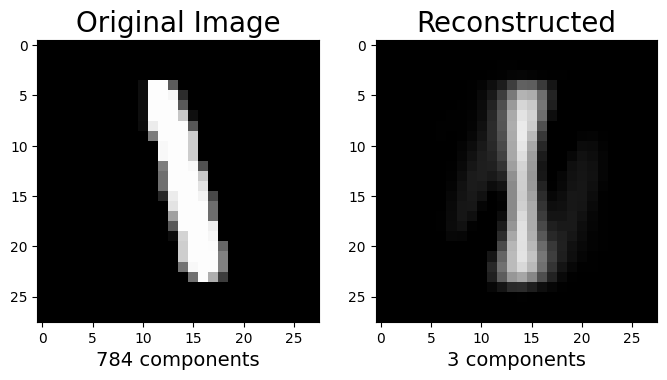

In [44]:
plt.figure(figsize=(8,4));
img_id = 555

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(data_sampled.drop('cluster_labels', axis=1).to_numpy()[img_id,:].reshape(28,28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 3 principal components
plt.subplot(1, 2, 2);
plt.imshow(reconstruced_data_df.to_numpy()[img_id, :].reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel(str(model.n_components_) + ' components', fontsize = 14)
plt.title('Reconstructed', fontsize = 20);

What does traversing PC1 look like?

In [45]:
components_df = pd.DataFrame(model.components_, index=['PC1', 'PC2', 'PC3'])
components_df

loadings = components_df.mul(np.sqrt(model.explained_variance_), axis=0)

loadings_df = pd.DataFrame(loadings, index=['PC1', 'PC2', 'PC3'])
loadings_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
PC1,3.434088e-20,-1.353771e-20,5.321214e-23,-6.657069e-24,1.039600e-23,-3.673669e-25,-1.158750e-25,7.320997e-28,-1.909095e-27,4.942339e-27,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
PC2,1.704238e-17,2.572360e-17,1.905485e-18,-6.035816e-20,3.648010e-20,6.241237e-22,-5.287219e-22,4.755968e-23,1.270581e-22,5.850840e-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PC3,-1.796805e-17,5.282223e-17,-2.387914e-18,4.030743e-20,-5.841178e-22,-4.122602e-21,1.462412e-22,-5.059720e-23,-1.443402e-22,2.280556e-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


How much is the variance along PC1?

In [46]:
loadings_df.T.describe()

,PC1,PC2,PC3
count,784.000000,784.000000,784.000000
mean,0.052235,0.010085,-0.000187
std,0.131512,0.076613,0.072308
min,-0.452235,-0.254547,-0.295077
25%,-0.000000,-0.002368,-0.000490
50%,0.000340,0.000000,0.000000
75%,0.111377,0.014929,0.010244
max,0.364998,0.266404,0.179356


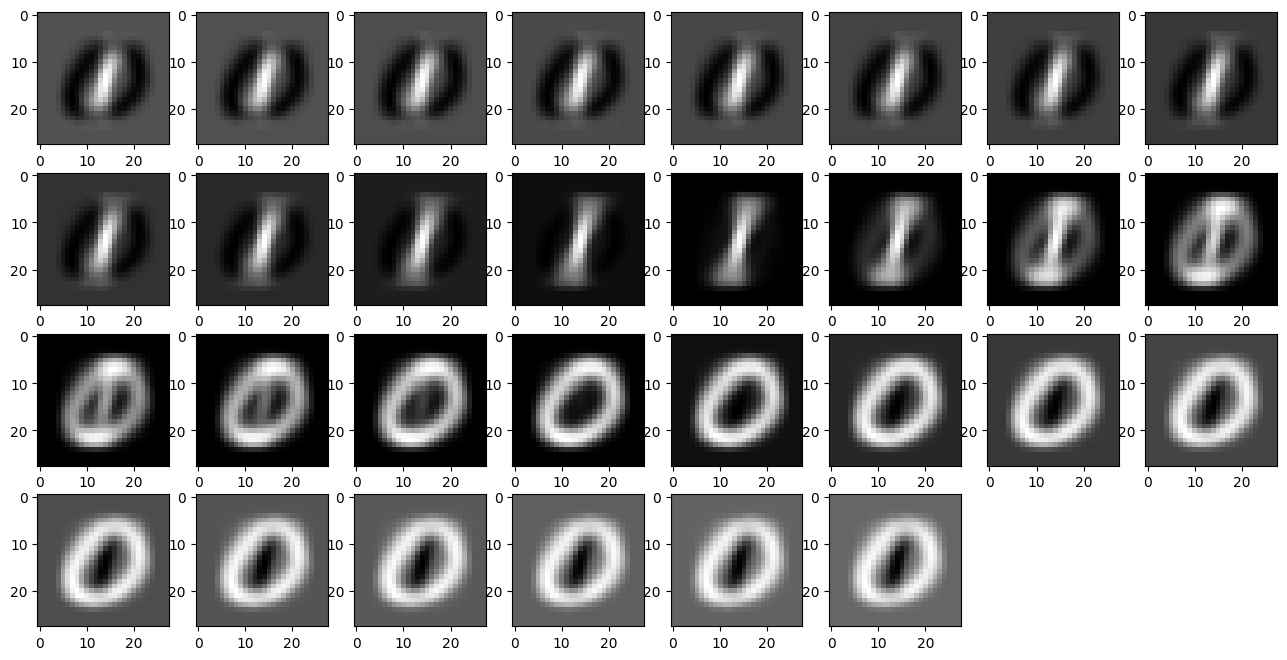

In [47]:
plt.figure(figsize=(16,8));
from PIL import Image

num_of_intermediate_steps_to_display = 30
scale = 1 # should be around 3 sigmas

# Get a PCA model with one component
model_onecomponent = PCA(n_components=1)
model_onecomponent.fit(data_sampled_withoutclusterlabel)



for i in np.arange(-int(num_of_intermediate_steps_to_display/2), int(num_of_intermediate_steps_to_display/2), 1): #for num_of_intermediate_steps_to_display steps
  reconstruction = model_onecomponent.inverse_transform(i*scale) # reconstruct

  # plot the digit
  plt.subplot(4, int(num_of_intermediate_steps_to_display/4 + 1), i+int(num_of_intermediate_steps_to_display/2)+1);
  plt.imshow(reconstruction.reshape(28, 28)*255,
              cmap = plt.cm.gray, interpolation='nearest');

## More clustering: What if we try other k values for clustering?

How about trying different k values for clustering and use the elbow method

  0%|          | 0/19 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

  5%|▌         | 1/19 [00:00<00:08,  2.18it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

 11%|█         | 2/19 [00:01<00:11,  1.46it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

 16%|█▌        | 3/19 [00:02<00:12,  1.29it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

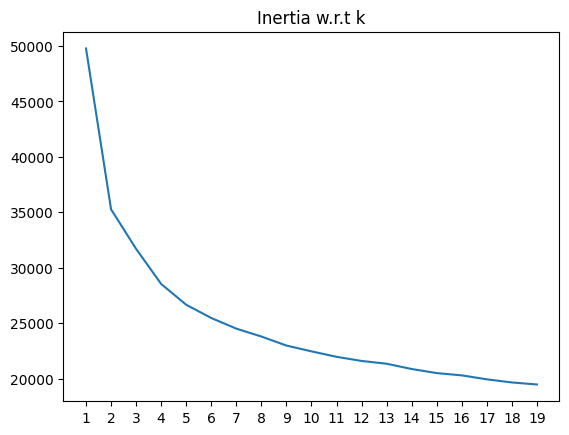

In [48]:
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
ks = 20

for k_ in tqdm(np.arange(1, ks)):
  kmeans_result = (KMeans(n_clusters=k_).fit(data_sampled))
  inertias.append(kmeans_result.inertia_)

plt.plot(np.arange(1, ks), inertias, label = 'inertia')
plt.xticks(np.arange(1, ks))
plt.title('Inertia w.r.t k')
plt.show()

###Scree plot

In [55]:
cum_var_exp = np.cumsum(PCA().fit(data_sampled_withoutclusterlabel).explained_variance_ratio_*100)

# plt.figure(figsize=(10, 5))
# plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
# plt.title('Cumulative Explained Variance as a Function of the Number of Components')
# plt.ylabel('Cumulative Explained variance')
# plt.xlabel('Principal components')
# plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
# plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
# plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
# plt.legend(loc='best')
# plt.show()

import plotly.express as px
px.line(cum_var_exp)

##Questions

1. What happens to the cluster centriods if there are too few images.
2. Sample two extreme points along PC2 and see what they look like...
3. Try different digits.